In [ ]:
# importing the required dependancies
import os
import matplotlib.pyplot as plt
import numpy as np
import albumentations as A 
import torch
import numpy as np
import cv2
from PIL import Image
import torch.nn as nn
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torch.utils.data import Dataset
import os


import warnings
warnings.filterwarnings('ignore')


In [ ]:
# importing the dataset from drive
!cp /content/drive/MyDrive/Deep_Learning_Projects/Fashion_Apparel_Classification/dataset/dataset.zip .

In [ ]:
# unzip downloaded dataset
import shutil

zip_file_path = "/content/dataset.zip"
extracted_folder_path = "/content/dataset"

shutil.unpack_archive(zip_file_path, extracted_folder_path)


Total Categories in the dataset:
{'Backpacks': 920, 'Trouser': 997, 'watch': 1000, 'Kurti': 918, 'Shirt': 999, 'Shoes': 913}




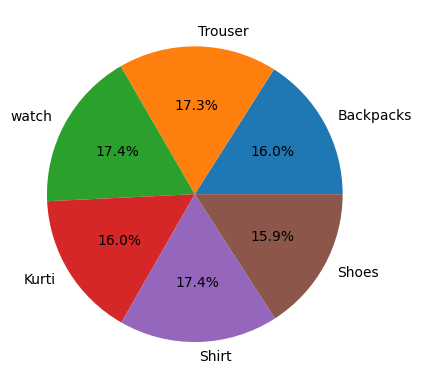

In [ ]:
# dataset path 
DATASET_PATH = "/content/dataset"

CATEGORIES_COUNT = {} 
CATEGORIES_LIST = os.listdir(DATASET_PATH)

for i in CATEGORIES_LIST:
  CATEGORIES_COUNT[i] = len(os.listdir(str(DATASET_PATH) + "/" +str(i)))

print(f"Total Categories in the dataset:\n{CATEGORIES_COUNT}")
print('\n')

CATEGORIES_COUNT = list(CATEGORIES_COUNT.values())
plt.pie(CATEGORIES_COUNT, labels=CATEGORIES_LIST, autopct='%1.1f%%');


## Image Classification

In [ ]:
# Importing Imagefolder
from torchvision.datasets import ImageFolder

# Pointing image folder toward directory
dataset = ImageFolder(root = DATASET_PATH)

In [ ]:
print(f"Total images in the dataset: {len(dataset)}")

Total images in the dataset: 5747


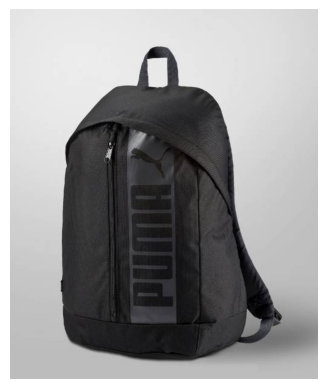

In [ ]:
# Visualize the single dataset element 
img, label = dataset[412]

plt.imshow(img)
plt.axis('OFF');

In [ ]:
# Importing transfroms
import torchvision.transforms as tt 

dataset = ImageFolder(DATASET_PATH,tt.Compose([tt.Resize(64), ## Resize the input image to the given size --> https://pytorch.org/vision/stable/generated/torchvision.transforms.Resize.html#torchvision.transforms.Resize
                                             tt.RandomCrop(64), ## Crop the given image at a random location. --> https://pytorch.org/vision/stable/generated/torchvision.transforms.RandomCrop.html#torchvision.transforms.RandomCrop
                                             tt.ToTensor()]))  ##Convert a PIL Image or ndarray to tensor and scale the values accordingly. --> https://pytorch.org/vision/stable/generated/torchvision.transforms.ToTensor.html?highlight=totensor#torchvision.transforms.ToTensor                 
                     

Shape of the image: torch.Size([3, 64, 64])


The image after transformation
(tensor([[[0.8980, 0.9059, 0.9059,  ..., 0.8431, 0.8392, 0.8353],
         [0.8980, 0.9059, 0.9059,  ..., 0.8431, 0.8392, 0.8353],
         [0.9059, 0.9059, 0.9098,  ..., 0.8431, 0.8392, 0.8353],
         ...,
         [0.7490, 0.7490, 0.7490,  ..., 0.5412, 0.5529, 0.5608],
         [0.7451, 0.7451, 0.7490,  ..., 0.5176, 0.5333, 0.5490],
         [0.7412, 0.7412, 0.7451,  ..., 0.5216, 0.5373, 0.5529]],

        [[0.8980, 0.9059, 0.9059,  ..., 0.8431, 0.8392, 0.8353],
         [0.8980, 0.9059, 0.9059,  ..., 0.8431, 0.8392, 0.8353],
         [0.9059, 0.9059, 0.9098,  ..., 0.8431, 0.8392, 0.8353],
         ...,
         [0.7490, 0.7490, 0.7490,  ..., 0.5412, 0.5529, 0.5608],
         [0.7451, 0.7451, 0.7490,  ..., 0.5176, 0.5333, 0.5490],
         [0.7412, 0.7412, 0.7451,  ..., 0.5216, 0.5373, 0.5529]],

        [[0.8980, 0.9059, 0.9059,  ..., 0.8431, 0.8392, 0.8353],
         [0.8980, 0.9059, 0.9059,  ..., 0.843

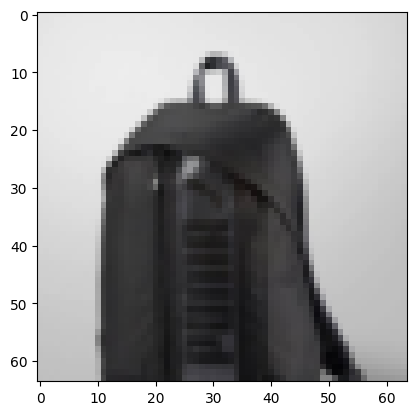

In [ ]:
# checking a random image
img, label = dataset[412]

print(f"Shape of the image: {img.shape}") # checking the size of the image
print("\n")

print("The image after transformation")
print(dataset[412]) # the pixel values are noramalized
print("\n")

plt.imshow(img.permute((1,2,0))); #This module returns a view of the tensor input with its dimensions permuted.

## Splitting the dataset

In [ ]:
VALIDATION_PERC = 0.1 # validation percentage

VALIDATION_SIZE = int(VALIDATION_PERC * len(dataset))
TRAIN_SIZE = len(dataset) - VALIDATION_SIZE

print(f"Size of the validation dataset: {VALIDATION_SIZE}")
print(f"Size of the train dataset: {TRAIN_SIZE}")

Size of the validation dataset: 574
Size of the train dataset: 5173


In [ ]:
# Importing the random_split
from torch.utils.data import random_split # Randomly split a dataset into non-overlapping new datasets of given lengths --> https://pytorch.org/docs/stable/data.html#torch.utils.data.random_split

train_dataset, validation_dataset = random_split(dataset, [TRAIN_SIZE, VALIDATION_SIZE])

print(f"After the split, the size of the train_dataset: {len(train_dataset)}")
print(f"After the split, the size of the validation_dataset: {len(validation_dataset)}")

After the split, the size of the train_dataset: 5173
After the split, the size of the validation_dataset: 574


## DataLoader

In [ ]:
# importing DataLoader
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

print(f"cpu_count in machine: {NUM_WORKERS}")

# dataloader for training dataset
train_dataloader = DataLoader(dataset = train_dataset,
                              batch_size=BATCH_SIZE,
                              num_workers=NUM_WORKERS,
                              shuffle=True)

# dataloader for validation dataset
validation_dataloader = DataLoader(dataset=validation_dataset, 
                                   batch_size=BATCH_SIZE, 
                                   num_workers=NUM_WORKERS,
                                   shuffle=False)

cpu_count in machine: 2


In [ ]:
# Get image and label from train_dataloader
train_dataloder_img, train_dataloder_label = next(iter(train_dataloader))

# Print out the shapes
train_dataloder_img.shape, train_dataloder_label.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

## Visualize some images from dataloader

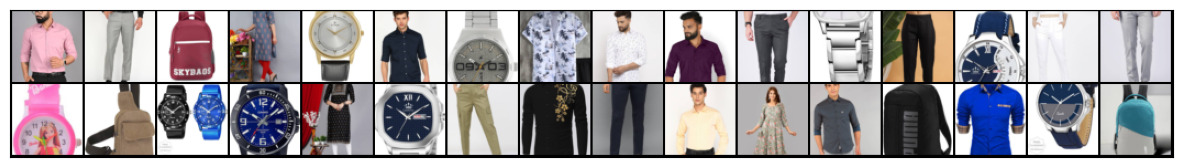

In [ ]:
from torchvision.utils import make_grid # Make a grid of images.

def show_batch(data_loader):
  for images, labels in data_loader:
    fig, ax = plt.subplots(figsize = (15,8))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
    break

show_batch(train_dataloader)

In [ ]:
# device setup
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## Model Training

In [ ]:
import torch.nn as nn 
import torch.nn.functional as F

# Create class for model training and evaluation
class ImageClassificationBase(nn.Module): ## --> nn.Module--> Base class for all neural network modules. --> https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module
  def training_step(self, batch):
    images, labels = batch
    images, labels = images.to(device), labels.to(device)
    out = self(images) # Generate predictions
    loss = F.cross_entropy(input= out, # Predicted unnormalized logits
                           target = labels) # Ground truth class indices or class probabilities
    return loss 
  
  def validation_step(self, batch):
    images, labels = batch
    images, labels = images.to(device), labels.to(device)
    out = self(images) # Generate predictions
    loss = F.cross_entropy(input = out, # Predicted unnormalized logits
                           target = labels) # Ground truth class indices or class probabilities
    acc = accuracy(outputs = out, # Calculate the accuracy
                   labels = labels)
    return {'validation_loss': loss.detach(), 'validation_accuracy':acc}

  def validation_epoch_end(self, outputs):
    batch_losses = [x['validation_loss'] for x in outputs]
    # combine the losses
    epoch_loss = torch.stack(batch_losses).mean() # PyTorch torch.stack() method joins (concatenates) a sequence of tensors (two or more tensors) along a new dimension.
    batch_accuracy = [x['validation_accuracy'] for x in outputs]
    epoch_accuracy = torch.stack(batch_accuracy).mean()
    return {'validation_loss':epoch_loss.item(), 'validation_accuracy':epoch_accuracy.item()}

  # printing the results
  def epoch_end(self, epoch, result):
    print(f"Epoch {epoch},\n train_loss:{result['train_loss']}, \n validation_loss: {result['validation_loss']}, \n validation_accuracy: {result['validation_accuracy']}")

def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim=1)
  return torch.tensor(torch.sum(preds == labels).item()/ len(preds))

In [ ]:
@torch.no_grad() # Context-manager that disabled gradient calculation.

def evaluate(model, validation_dataloader):
  """ Evaluate the model's performance on the validation dataset""" 
  model.eval()
  outputs = [model.validation_step(batch) for batch in validation_dataloader]
  return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
  history = []
  optimizer = opt_func(model.parameters(), lr)
  for epoch in range(epochs):
    # training 
    model.train()
    train_loss = [] 
    for batch in train_loader:
      loss = model.training_step(batch) # training the model for each batch
      train_loss.append(loss) # collecting the loss 
      loss.backward() # Computes the gradient of current tensor w.r.t. graph leaves.--> https://pytorch.org/docs/stable/generated/torch.Tensor.backward.html#torch-tensor-backward
      optimizer.step() # Performs a single optimization step (parameter update). --> https://pytorch.org/docs/stable/generated/torch.optim.Optimizer.step.html
      optimizer.zero_grad() # Sets the gradients of all optimized torch.Tensor s to zero. --> https://stackoverflow.com/a/48009142
                            # official_doc --> https://pytorch.org/docs/stable/generated/torch.optim.Optimizer.zero_grad.html
    
    # validation
    result = evaluate(model, validation_dataloader)
    result['train_loss'] = torch.stack(train_loss).mean().item()
    history.append(result)
  return history


In [ ]:
##Model Building
def conv_block(in_channels, out_channels, pool=False):
  
  layers = [nn.Conv2d(in_channels=in_channels,    # Number of channels in the input image
                      out_channels=out_channels,  # Number of channels produced by the convolution
                      kernel_size=3, # Size of the convolving kernel
                      padding=1), # Padding added to all four sides of the input
            nn.BatchNorm2d(num_features=out_channels), # num_features (int)-->'C'from an expected input of size (N,C,H,W) --> https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html#torch.nn.BatchNorm2d
            nn.ReLU(inplace =True)] #-> https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#relu
  if pool: layers.append(nn.MaxPool2d(kernel_size=2)) # --> https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html#torch.nn.MaxPool2d
  return nn.Sequential(*layers)

In [ ]:
class ResNet9(ImageClassificationBase): 
  def __init__(self, in_channels, num_classes):
    super().__init__()
    # input: 32 x 3 x 64 x 64 
    self.conv1 = conv_block(in_channels, 64) # 32 x 64 x 64 x 64 
    self.conv2 = conv_block(64, 128, pool=True) # 32 x 128 x 32 x 32 
    self.res1 = nn.Sequential(conv_block(128, 128), # 32 x 128 x 32 x 32 
                              conv_block(128, 128)) # 32 x 128 x 32 x 32
    
    self.conv3 = conv_block(128, 256, pool=True) # 32 X 256 x 16 x 16 
    self.conv4 = conv_block(256, 512, pool=True) # 32 x 256 x 8 x 8
    self.res2 = nn.Sequential(conv_block(512, 512), # 32 x 512 x 8 x 8 --> residual_blocks --> ## https://towardsdatascience.com/resnets-residual-blocks-deep-residual-learning-a231a0ee73d2#:~:text=A%20residual%20block%20is%20a,layer%20in%20the%20main%20path.
                              conv_block(512, 512)) # 32 x 512 x 8 x 8

    self.classifier = nn.Sequential(nn.AdaptiveAvgPool2d(1), # 32 x 512 x 1 x 1 --> official_documenataion -->https://pytorch.org/docs/stable/generated/torch.nn.AdaptiveMaxPool2d.html#torch.nn.AdaptiveMaxPool2d --> simplified_version--> https://stackoverflow.com/a/55869581
                                    nn.Flatten(), # Flattens a contiguous range of dims into a tensor --> https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html#torch.nn.Flatten -->simplified_version --> https://www.tutorialspoint.com/how-to-flatten-an-input-tensor-by-reshaping-it-in-pytorch
                                    nn.Dropout(0.2), # During training, randomly zeroes some of the elements of the input tensor --> https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html#torch.nn.Dropout --> https://www.geeksforgeeks.org/dropout-in-neural-networks/
                                    nn.Linear(in_features = 512, 
                                              out_features = num_classes)) # Applies a linear transformation to the incoming data -->https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear -->https://stackoverflow.com/a/54924812

  def forward(self, xb):
    out = self.conv1(xb)
    out = self.conv2(out)
    out = self.res1(out) + out
    out = self.conv3(out)
    out = self.conv4(out)
    out = self.res2(out) + out 
    out = self.classifier(out)
    return out 

In [ ]:
model = ResNet9(3, len(dataset.classes)).to(device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [ ]:
# Install torchinfo, import if it's available
# Torchinfo provides information complementary to what is provided by print(your_model) in PyTorch, 
# similar to Tensorflow's model.summary() API to view the visualization of the model, which is helpful while debugging your network.

try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(model, input_size=[1, 3, 64, 64])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Layer (type:depth-idx)                   Output Shape              Param #
ResNet9                                  [1, 6]                    --
├─Sequential: 1-1                        [1, 64, 64, 64]           --
│    └─Conv2d: 2-1                       [1, 64, 64, 64]           1,792
│    └─BatchNorm2d: 2-2                  [1, 64, 64, 64]           128
│    └─ReLU: 2-3                         [1, 64, 64, 64]           --
├─Sequential: 1-2                        [1, 128, 32, 32]          --
│    └─Conv2d: 2-4                       [1, 128, 64, 64]          73,856
│    └─BatchNorm2d: 2-5                  [1, 128, 64, 64]          256
│    └─ReLU: 2-6                         [1, 128, 64, 64]          --
│    └─MaxPool2d: 2-7                    [1, 128, 32, 32]          --
├─Sequential: 1-3                        [1, 128, 32, 32]          --
│    └─Sequential: 2-8                   [1, 128, 32, 32]          --
│    │    └─Conv2d: 3-1                  [1, 128, 32, 32]          147,584
│

In [ ]:
torch.cuda.empty_cache() # Releases all unoccupied cached memory currently held by the caching allocator so that those can be used in other GPU application and visible in nvidia-smi.
# official documentation --> https://pytorch.org/docs/stable/generated/torch.cuda.empty_cache.html#torch.cuda.empty_cache

for batch in train_dataloader:
  images, labels = batch
  print(f"image shape: ", images.shape)
  print(f"images device: ", images.device)
  preds = model(images.to(device))
  print('preds.shape', preds.shape)
  break

image shape:  torch.Size([32, 3, 64, 64])
images device:  cpu
preds.shape torch.Size([32, 6])


In [ ]:
history = [evaluate(model.to(device), 
                    validation_dataloader)]
history

[{'validation_loss': 1.794392466545105,
  'validation_accuracy': 0.15138888359069824}]

In [ ]:
# plotting the accuracy of model
def plot_accuracies(history):
    accuracies = [x['validation_accuracy'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs')
    plt.grid(True);  # Add grid lines

In [ ]:
#plotting the losses of model
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['validation_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs')
    plt.grid(True);  # Add grid lines

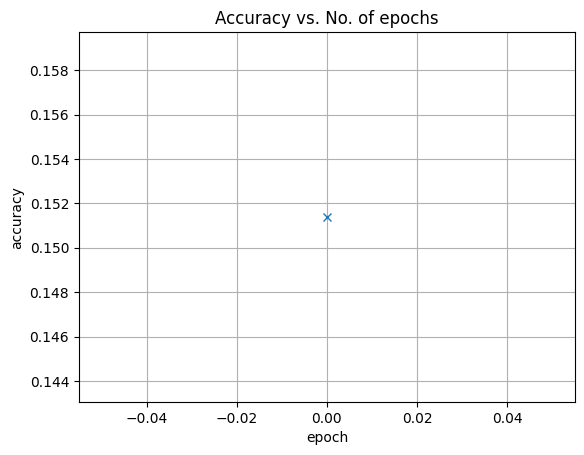

In [ ]:
plot_accuracies(history)

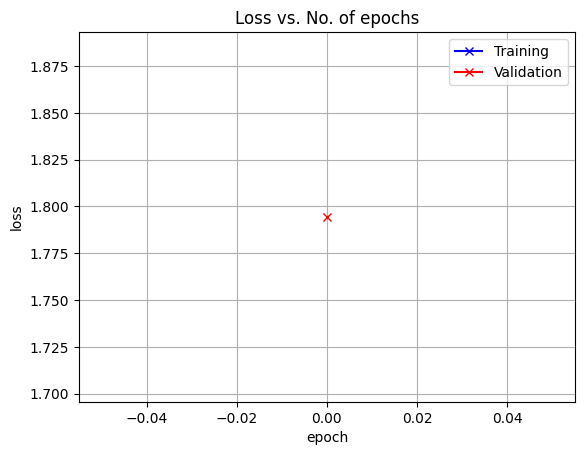

In [ ]:
plot_losses(history)

In [ ]:
history += fit(epochs=5,
               lr=0.01,
               model=model,
               train_loader=train_dataloader,
               val_loader=validation_dataloader,
               opt_func=torch.optim.Adam)

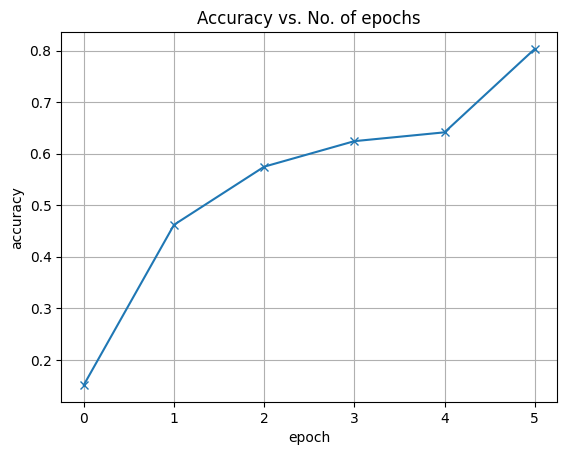

In [ ]:
plot_accuracies(history)

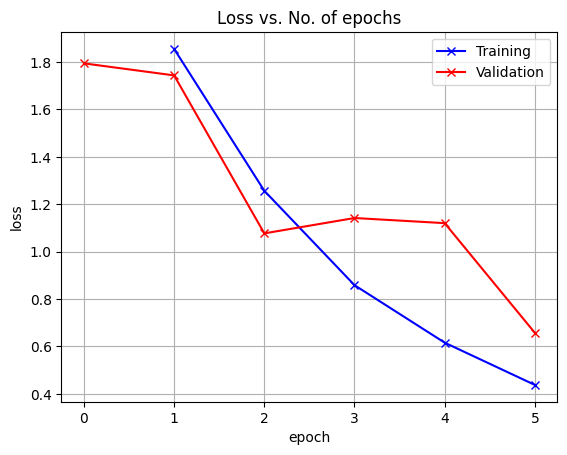

In [ ]:
plot_losses(history)

In [ ]:
history += fit(epochs=10,
               lr=0.01,
               model=model,
               train_loader=train_dataloader,
               val_loader=validation_dataloader,
               opt_func=torch.optim.Adam)

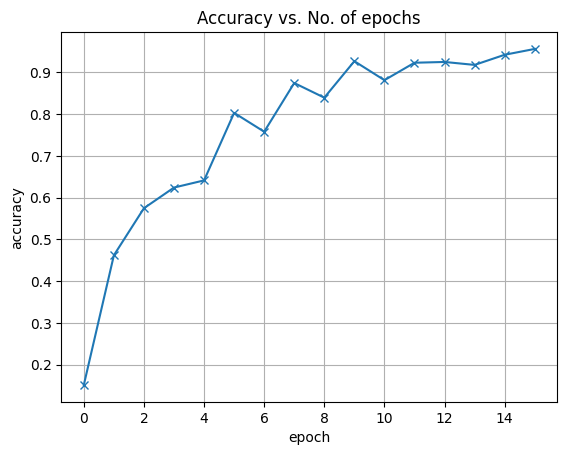

In [ ]:
plot_accuracies(history)

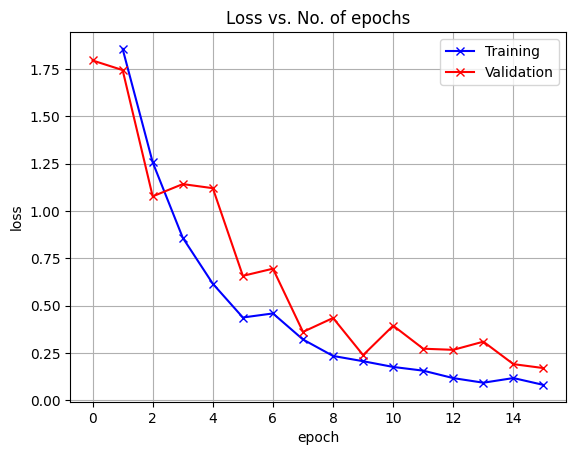

In [ ]:
plot_losses(history)

In [ ]:
# Test with individual Images
def predict_image(img, model, classes):
  # convert to a batch of 1
  xb = img.unsqueeze(0).to(device) # It returns a new tensor with a dimension of size one inserted at the specified position dim. --> https://www.geeksforgeeks.org/how-to-squeeze-and-unsqueeze-a-tensor-in-pytorch/
  # Get the prediction from the model
  yb = model(xb)
  # pick index with highest probability
  _, preds = torch.max(yb, dim=1)
  # Retreive the class label
  return classes[preds[0].item()]

In [ ]:
def show_image_prediction(img, label):
  plt.imshow(img.permute(1,2,0)) # Returns a view of the original tensor input with its dimensions permuted.-->https://pytorch.org/docs/stable/generated/torch.permute.html#torch.permute
  pred = predict_image(img, model, dataset.classes)
  print("Target:", dataset.classes[label])
  print('Prediction:', pred)

Target: Trouser
Prediction: Trouser


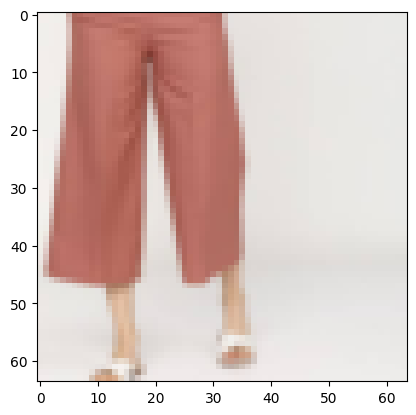

In [ ]:
show_image_prediction(*validation_dataset[23])

Target: Kurti
Prediction: Kurti


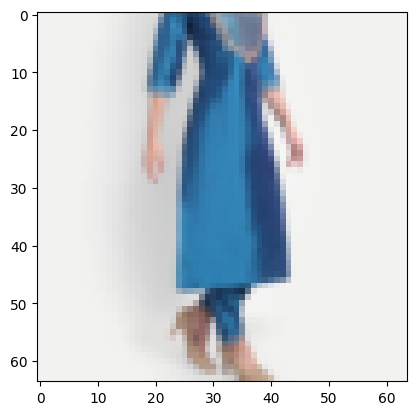

In [ ]:
import random
random_number = random.randint(1, len(validation_dataset))

show_image_prediction(*validation_dataset[int(random_number)])

Target: Trouser
Prediction: Trouser


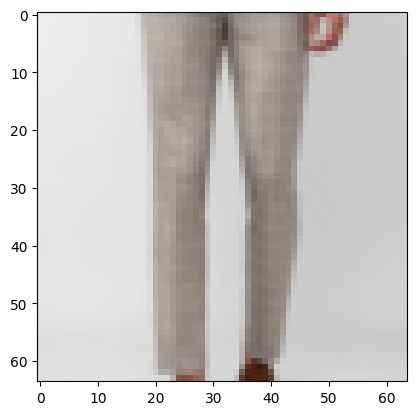

In [ ]:
random_number = random.randint(1, len(validation_dataset))
show_image_prediction(*validation_dataset[int(random_number)])

Target: watch
Prediction: watch


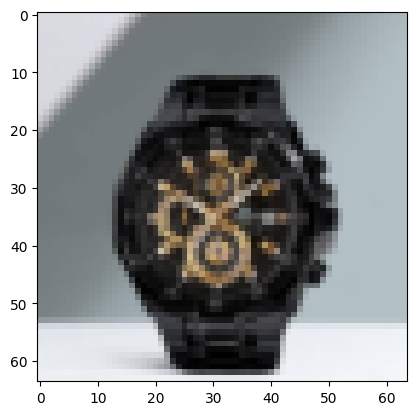

In [ ]:
random_number = random.randint(1, len(validation_dataset))
show_image_prediction(*validation_dataset[int(random_number)])

Target: Trouser
Prediction: Trouser


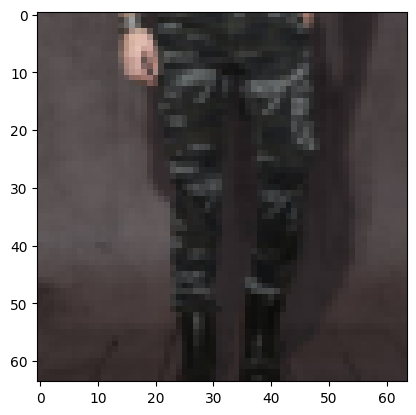

In [ ]:
random_number = random.randint(1, len(validation_dataset))
show_image_prediction(*validation_dataset[int(random_number)])

In [ ]:
from torchvision import transforms
def model_prediction(img):
    # Open the image
    image = Image.open(img)

    # Define the transformations
    transform = transforms.Compose([
        transforms.Resize(64),
        transforms.RandomCrop(64),
        transforms.ToTensor()
    ])

    # Apply the transformations to the image
    transformed_image = transform(image)

    # Make predictions
    pred = predict_image(transformed_image, model, dataset.classes)

    # Display the image and prediction
    plt.imshow(image)
    print('Prediction:', pred)


In [ ]:
from google.colab import files
from IPython.display import clear_output

def upload_image():
    # Prompt the user to upload an image file
    uploaded = files.upload()

    # Get the file name of the uploaded image
    file_name = next(iter(uploaded.keys()))
    
    # Clear the output cell
    clear_output()

    return file_name


Prediction: Shoes


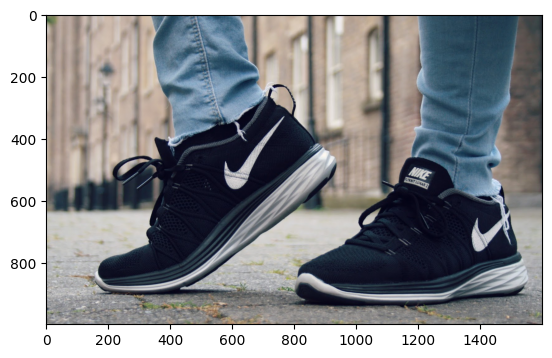

In [ ]:
# making the prediction
file_name = upload_image()
model_prediction(file_name)

Prediction: Shirt


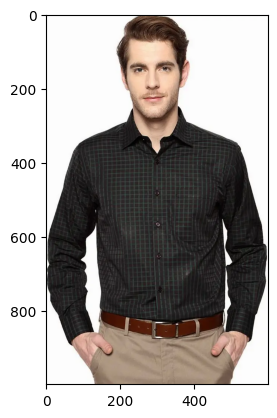

In [ ]:
# making the prediction
file_name = upload_image()
model_prediction(file_name)

In [ ]:
dummy_input = torch.randn(1, 3, 64, 64).to(device)

In [ ]:
# Exporting the model in ONNX format --> official doc --> https://pytorch.org/tutorials/advanced/super_resolution_with_onnxruntime.html
torch.onnx.export(model, # model being run
                  dummy_input, # model being run(shape of the input)
                  'model.onnx', # where to save the model (exported model name, model is saved in current working directory)
                  opset_version=10, # the ONNX version to export the model to
                  input_names=['input'], # the model's input names
                  output_names=['output']) # the model's input names

============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



In [ ]:
!pip install onnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 65.1 MB/s eta 0:00:00


In [ ]:
!pip install onnxruntime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 13.4 MB/s eta 0:00:00


## Final Model

In [ ]:
import onnxruntime
import numpy as np
from PIL import Image
from torchvision import transforms

# Load the ONNX model
model_path = 'model.onnx'
session = onnxruntime.InferenceSession(model_path)

# Define the image transformation function
def image_transformation(img):
    # Open the image
    image = Image.open(img)

    # Define the transformations
    transform = transforms.Compose([
        transforms.Resize((64, 64)),
        transforms.ToTensor()
    ])

    # Apply the transformations to the image
    transformed_image = transform(image)

    return transformed_image

# Define the class labels
class_labels = ['Backpacks', 'Kurti', 'Shirt', 'Shoes', 'Trouser', 'watch']

# Perform inference
input_image = image_transformation('/content/check-stretch-shirt.webp')
input_tensor = np.expand_dims(input_image, axis=0)

# Run inference
input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name
output = session.run([output_name], {input_name: input_tensor})

# Postprocess the output
output = output[0]
predicted_class_index = np.argmax(output)
predicted_class = class_labels[predicted_class_index]

# Print the predicted class
print("Predicted class:", predicted_class)


Predicted class: Shirt


Predicted class: Shoes


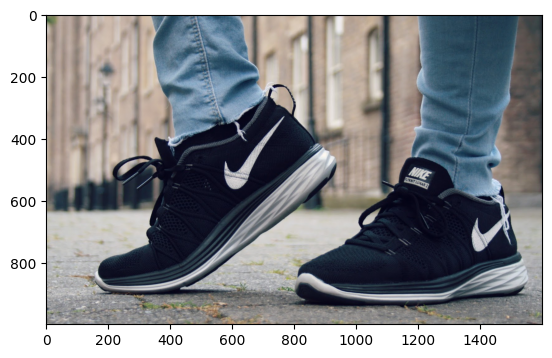

In [ ]:
import onnxruntime
import numpy as np
from PIL import Image
from torchvision import transforms

# Load the ONNX model
model_path = 'model.onnx'
session = onnxruntime.InferenceSession(model_path)

# Define the image transformation function
def image_transformation(img):
    # Open the image
    image = Image.open(img)

    # Define the transformations
    transform = transforms.Compose([
        transforms.Resize((64, 64)),
        transforms.ToTensor()
    ])

    # Apply the transformations to the image
    transformed_image = transform(image)

    return transformed_image

# Define the class labels
class_labels = ['Backpacks', 'Kurti', 'Shirt', 'Shoes', 'Trouser', 'Watch']

# Define the function for inference and displaying the image
def infer_and_display_image(image_path):
    # Perform inference
    input_image = image_transformation(image_path)
    input_tensor = np.expand_dims(input_image, axis=0)

    # Run inference
    input_name = session.get_inputs()[0].name
    output_name = session.get_outputs()[0].name
    output = session.run([output_name], {input_name: input_tensor})

    # Postprocess the output
    output = output[0]
    predicted_class_index = np.argmax(output)
    predicted_class = class_labels[predicted_class_index]

    # Display the image
    image = Image.open(image_path)
    plt.imshow(image)

    # Print the predicted class
    print("Predicted class:", predicted_class)

# Call the function with the image path
image_path = '/content/OIP.jpg'
infer_and_display_image(image_path)


Predicted class: Shirt


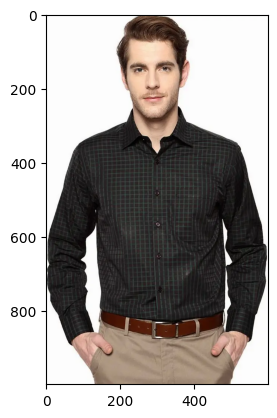

In [ ]:
# making the prediction
file_name = upload_image()
infer_and_display_image(file_name)